<a href="https://colab.research.google.com/github/SruthyMencherychinnan/Project_fake_job_posting_prediction/blob/master/Fake_Job_Posting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all the required libraries to perform
from nltk.corpus.reader.plaintext import nltk
import json
import pandas as pd
import numpy as np
import re
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import nltk as nlp
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


This file contains the dataset of job descriptions and their meta information.The data is a combination of integer, binary and textual data types. A small proportion of these descriptions are fake or scam which can be identified by the column "fraudulent".This is a dataset of 17880 rows × 18 columns.

In [ ]:
df=pd.read_csv('/content/fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

Since most of the datatypes are either Booleans or text, a summary statistic is not needed here. The only integer is job_id which is not relevant for this analysis. The dataset is further explored to identify null values.

In [ ]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


Exploratory Analysis

The first step to visualize the dataset in this project is to create a correlation matrix to study the numeric data relationship. The correlation matrix does not exhibit any strong positive or negative correlations between the numeric data.However, an interesting trend was noted for the Boolean variable telecommuting. When both these variables had a value equal to zero, there is a 92% chance that the job will be fraudulent.

<AxesSubplot:title={'center':'corelation Matrix'}>

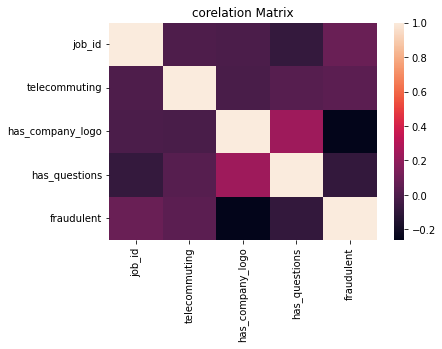

In [ ]:
plt.title('corelation Matrix')
sns.heatmap(df.corr())


In [ ]:
df['fraudulent'].value_counts()


0    17014
1      866
Name: fraudulent, dtype: int64

The dataset is highly unbalanced, with 95% of the jobs being real and only 5% of the fraudulent jobs.

<AxesSubplot:title={'center':'Fraudulent and non-fraudulent job posts'}, ylabel='fraudulent'>

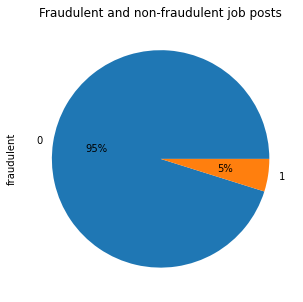

In [ ]:
#Fraudulent and non-fraudulent job posts
plt.figure(figsize=(8,5))
plt.title('Fraudulent and non-fraudulent job posts')
df['fraudulent'].value_counts()[:7].plot(kind='pie',autopct='%1.0f%%')

In [ ]:
df['required_experience'].value_counts()


Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of jobs with experience'}, xlabel='required_experience', ylabel='count'>

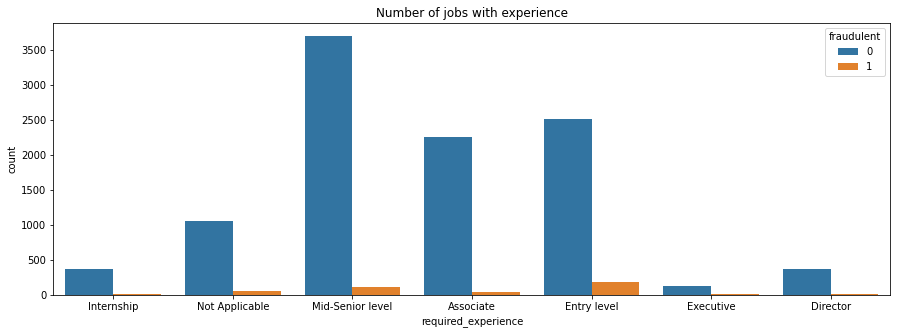

In [ ]:
#Expected experience
plt.figure(figsize=(15,5))
plt.title('Number of jobs with experience')
sns.countplot('required_experience',data=df,hue='fraudulent')


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Job posting based on education'}, xlabel='required_education', ylabel='count'>

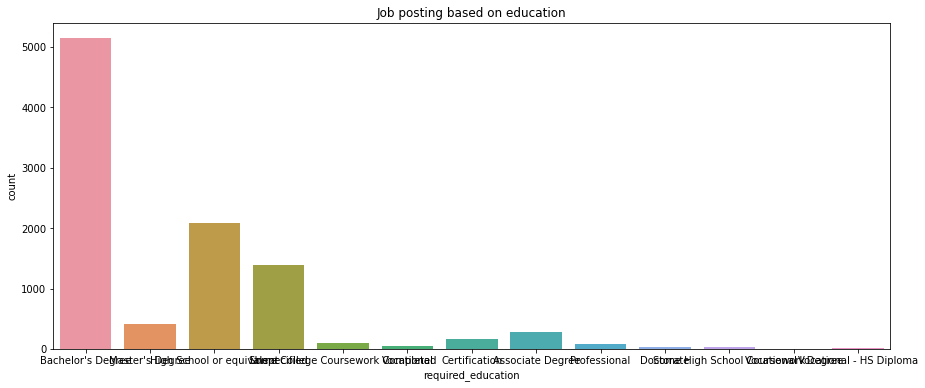

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Job posting based on education')
sns.countplot('required_education',data=df)

In [ ]:
#Number of jobs posted based on countries
new=df['location'].str.split(",",n=1,expand=True)
df['country']=new[0]


In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [ ]:
df['country'].value_counts()[:14]

US    10656
GB     2384
GR      940
CA      457
DE      383
NZ      333
IN      276
AU      214
PH      132
NL      127
BE      117
IE      114
SG       80
HK       77
Name: country, dtype: int64

The graph below shows which states produce the greatest number of jobs. California, New York, and Texas have the highest number of job postings.

Text(0.5, 0, 'countries')

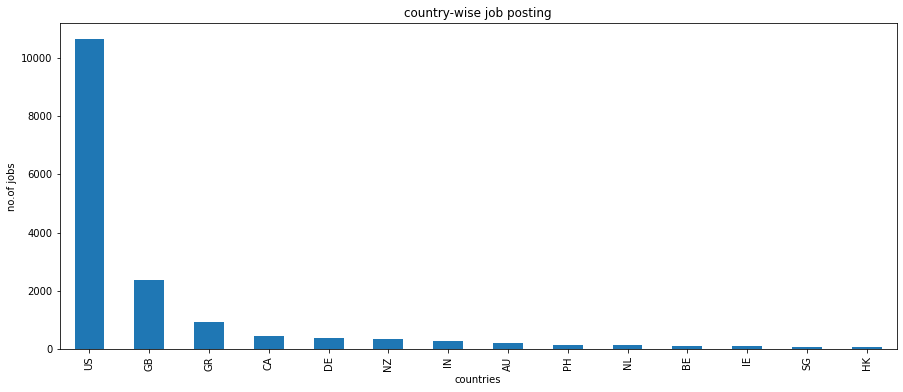

In [ ]:
plt.figure(figsize=(15,6))
plt.title('country-wise job posting')
df['country'].value_counts()[:14].plot(kind='bar')
plt.ylabel('no.of jobs')
plt.xlabel('countries')

This bar plot shows the distribution of fake and real jobs

In [ ]:
plt.figure(figsize=(500,200))
plt.title('Fraudulent and non-fraudulent job posting in countries')
y=df['country']
sns.countplot(y,data=df,hue='fraudulent')
plt.xlabel('countries')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Fraudulent and non-fraudulent job posting in countries'}, xlabel='country', ylabel='count'>

Handling the null values

In [ ]:
df.fillna(' ',inplace=True)

In [ ]:
#Making a new column called combo_text which is the combination of all the text columns
df['combo_text']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['location']+' '+df['department']+' '+df['benefits']+' '+df['employment_type']+' '+df['required_education']+' '+df['required_experience']+' '+df['industry']+' '+df['function']+' '+df['country']

In [ ]:
#Droping the unwated columns
df1=df.drop(['job_id','salary_range','description','title','requirements','benefits','location','company_profile','department','employment_type','required_experience','required_education','industry','function','country'],axis=1)
df1

,telecommuting,has_company_logo,has_questions,fraudulent,combo_text
0,0,1,0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,1,0,0,Customer Service - Cloud Video Production 90 S...
2,0,1,0,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,1,0,0,Account Executive - Washington DC Our passion ...
4,0,1,1,0,Bill Review Manager SpotSource Solutions LLC i...
...,...,...,...,...,...
17875,0,1,1,0,Account Director - Distribution Vend is looki...
17876,0,1,1,0,Payroll Accountant WebLinc is the e-commerce p...
17877,0,0,0,0,Project Cost Control Staff Engineer - Cost Con...
17878,0,0,1,0,Graphic Designer Nemsia Studios is looking f...


In [ ]:
df1.isna().sum()

telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
combo_text          0
dtype: int64

**Pre-processing**

In [ ]:
df1['combo_text']=df1['combo_text'].str.replace('[^a-zA-Z0-9]+',' ')

<ipython-input-31-c63defc182ff>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['combo_text']=df1['combo_text'].str.replace('[^a-zA-Z0-9]+',' ')


In [ ]:
lematizer=WordNetLemmatizer()
def text_cleaning(text):
  text=text.lower()
  text=text.split()
  text=[lematizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
  return ' '.join(text)

In [ ]:
nltk.download('omw-1.4')
df1['combo_text']=df1['combo_text'].apply(text_cleaning)
df1['combo_text']

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0        marketing intern food52 created groundbreaking...
1        customer service cloud video production 90 sec...
2        commissioning machinery assistant cma valor se...
3        account executive washington dc passion improv...
4        bill review manager spotsource solution llc gl...
                               ...                        
17875    account director distribution vend looking awe...
17876    payroll accountant weblinc e commerce platform...
17877    project cost control staff engineer cost contr...
17878    graphic designer nemsia studio looking experie...
17879    web application developer vend looking awesome...
Name: combo_text, Length: 17880, dtype: object

In [ ]:
fraud_jobs=df1[df1.fraudulent==1].combo_text
real_jobs=df1[df1.fraudulent==0].combo_text
real_jobs

0        marketing intern food52 created groundbreaking...
1        customer service cloud video production 90 sec...
2        commissioning machinery assistant cma valor se...
3        account executive washington dc passion improv...
4        bill review manager spotsource solution llc gl...
                               ...                        
17875    account director distribution vend looking awe...
17876    payroll accountant weblinc e commerce platform...
17877    project cost control staff engineer cost contr...
17878    graphic designer nemsia studio looking experie...
17879    web application developer vend looking awesome...
Name: combo_text, Length: 17014, dtype: object

In [ ]:
df1

,telecommuting,has_company_logo,has_questions,fraudulent,combo_text
0,0,1,0,0,marketing intern food52 created groundbreaking...
1,0,1,0,0,customer service cloud video production 90 sec...
2,0,1,0,0,commissioning machinery assistant cma valor se...
3,0,1,0,0,account executive washington dc passion improv...
4,0,1,1,0,bill review manager spotsource solution llc gl...
...,...,...,...,...,...
17875,0,1,1,0,account director distribution vend looking awe...
17876,0,1,1,0,payroll accountant weblinc e commerce platform...
17877,0,0,0,0,project cost control staff engineer cost contr...
17878,0,0,1,0,graphic designer nemsia studio looking experie...


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


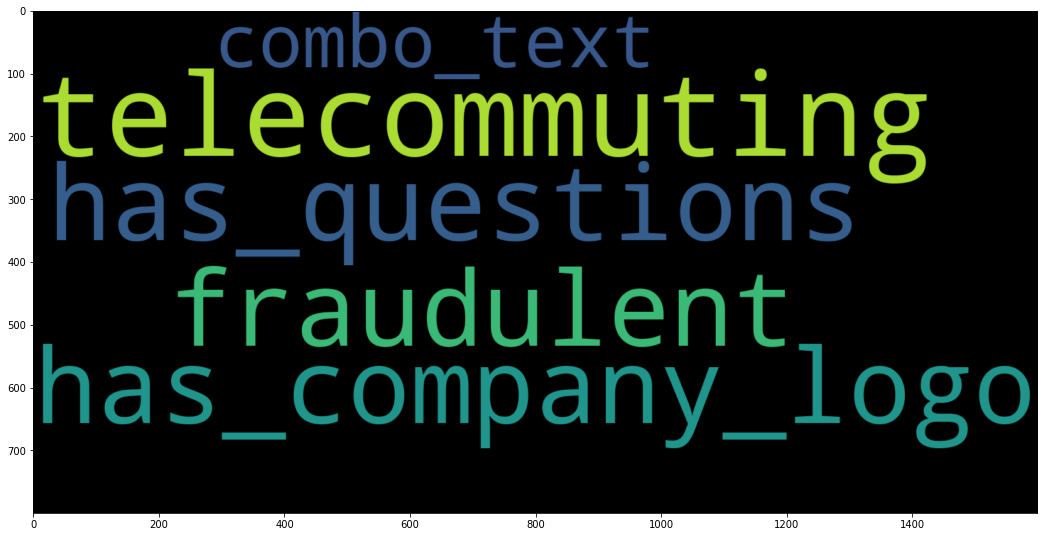

In [ ]:
#Wordcloud for real job posting

plt.figure(figsize=(18,20))
wc = WordCloud(width=1600,height=800,max_words=3000).generate(' '.join(df1[df1.fraudulent==0]))
plt.imshow(wc, interpolation = 'bilinear')
 

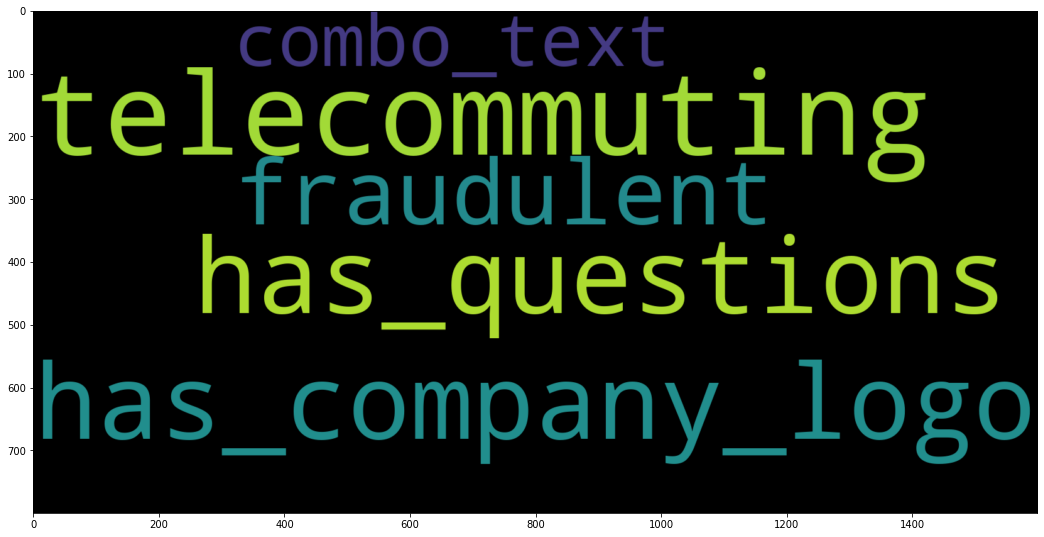

In [ ]:
#Wordcloud for fake job posting
plt.figure(figsize=(18,20))
wc = WordCloud(width=1600,height=800,max_words=3000).generate(' '.join(df1[df1.fraudulent==1]))
plt.imshow(wc, interpolation = 'bilinear')

Splitiing input and output Data

In [ ]:
x=df1.combo_text
x

0        marketing intern food52 created groundbreaking...
1        customer service cloud video production 90 sec...
2        commissioning machinery assistant cma valor se...
3        account executive washington dc passion improv...
4        bill review manager spotsource solution llc gl...
                               ...                        
17875    account director distribution vend looking awe...
17876    payroll accountant weblinc e commerce platform...
17877    project cost control staff engineer cost contr...
17878    graphic designer nemsia studio looking experie...
17879    web application developer vend looking awesome...
Name: combo_text, Length: 17880, dtype: object

In [ ]:
y=df1['fraudulent']
y

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

Splitting data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


In [ ]:
tfid=TfidfVectorizer(min_df=0,max_df=1,ngram_range=(1,3))
tfid_train=tfid.fit_transform(x_train)
tfid_test=tfid.transform(x_test)


Developing the model using Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion="entropy")
model.fit(tfid_train,y_train)
y_pred=model.predict(tfid_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Model accuracy Score

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
mat=confusion_matrix(y_pred,y_test)
mat
score=accuracy_score(y_pred,y_test)
score

0.964951528709918

[[5137  188]
 [   0   39]]


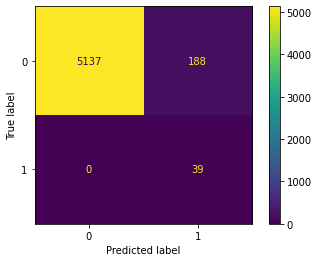

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
label=['0','1']   #assign categories as a variable
mat=confusion_matrix(y_pred,y_test)
cmd=ConfusionMatrixDisplay(mat,display_labels=label)
cmd.plot()
print(mat)